<a href="https://colab.research.google.com/github/NosenkoArtem/MADMO/blob/master/hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Эта домашка направлена на работу с пакетами NumPy, Pandas и Matplotlib путём решения набора задач. В данном задании разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью задания является редактирование данного jupyter notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в задании функции.

## Основы Python, библиотека numpy

![](https://pics.me.me/1-import-numpy-1-import-numpy-as-np-there-is-31232276.png)

Эта секция содержит ряд задач вида "реализуйте функцию". Для большинства из них тесты написаны мною, в остальных случаях вам предстоит написать тесты самостоятельно, пользуясь описанием.

**Важно:** во всех задачах этой секции (кроме 4) **запрещено использовать питоновские циклы**.

In [0]:
import numpy as np

### Задача 1 (1 балл)
Реализуйте функцию, которая на вход принимает два массива ```X``` и ```Y``` (массивы могут быть n-мерные, но их размерности должны совпадать), а возвращает **True** если они равны и **False** - иначе.

In [0]:
def detect_identic(X, Y):
    return np.array_equal(X, Y)

In [0]:
# Some tests
X = np.array([1, 2])
Y = np.array([3, 4])
assert not detect_identic(X, Y)

X = np.array([
    [1, 3],
    [2, 4]
])
Y = np.array([
    [1, 4],
    [2, 3]
])
assert not detect_identic(X, Y)

X = np.array([1, 3])
Y = np.array([1, 3])
assert detect_identic(X, Y)

X = np.array([
    [2, 2],
    [2, 3]
])
Y = np.array([
    [2, 2],
    [2, 3]
])
assert detect_identic(X, Y)

### Задача 2 (1 балл)

Реализуйте функцию, которая на вход принимает цветное изображение ```X``` (трехмерный вектор размера (n, m, 3)) и возвращает среднее значение по трём каналам (вектор длины 3).

In [0]:
def mean_channel(X):
    return X.mean(axis=(0,1))

In [0]:
# Some tests
X = np.ones((2, 2, 3))
X = X * np.array([1, 2, 3])
ans = np.array([1, 2, 3])
assert (mean_channel(X) == ans).all()

X = np.zeros((3, 3, 3))
ans = np.zeros(3)
assert (mean_channel(X) == ans).all()

### Задача 3 (2 балла)



Реализуйте функцию, принимающую на вход матрицу ```X``` и некоторое число ```a``` и возвращающую ближайший к числу элемент матрицы.

Например, для ```X = np.arange(0,10).reshape((2, 5))``` и ```a = 3.6``` ответом будет 4.

In [0]:
import numpy as np

In [0]:
def nearest_value(X, a):
    X = X.reshape(-1)
    return X[np.argmin(np.abs(X-a))]

In [0]:
# Some tests
X = np.linspace(1, 10, 50).reshape((10, 5))

assert np.isclose(nearest_value(X, 4), 3.938775510204082)
assert np.isclose(nearest_value(X, 5), 5.040816326530613)
assert np.isclose(nearest_value(X, 7), 7.061224489795919)
assert np.isclose(nearest_value(X, 9), 9.081632653061225)

### Задача 4 (1 балл)
В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [0]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((1000,1000))
b = np.random.sample((1000,1000))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?

print(a.ndim, b.ndim)
"a.shape-размер матрицы"

2 2


'a.shape-размер матрицы'

In [0]:
def mult(a, b):
    rez = np.zeros((a.shape[0], b.shape[0]))
    for i in range(a.shape[0]):
        for j in range(b.shape[1]):
            rez[i,j] = sum(a[i]*b[:,j])
    return rez

In [0]:
def np_mult(a, b):
    return np.dot(a, b)

In [0]:
%%time
# засечем время работы функции без NumPy
c = mult(a,b)

CPU times: user 2min 47s, sys: 47.6 ms, total: 2min 48s
Wall time: 2min 48s


In [0]:
%%time
# засечем время работы функции с NumPy
d = np_mult(a,b)

CPU times: user 123 ms, sys: 11 ms, total: 134 ms
Wall time: 81 ms


**В этой задаче вы пишете тесты сами**

Для тестирования нужно сравнить результаты работы ваших функциий c np.dot

In [0]:
assert (np.round(c,5) == np.round(d,5)).all()

### Задача 5 (2 балла)
Напишите функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение. Для тестирования можно сгенерировать с помощью метода *numpy.random.randint* случайную матрицу и проверить на ней работу метода.  Убедитесь, что в функции не будет происходить деления на ноль. 

**В этой задаче вы пишете тесты сами**

Для тестирования нужно сравнить результаты работы вашей функции со StandartScaler из sklearn. Пример его использования разобран в последнем семинарском ноутбуке.

In [0]:
import numpy as np

from sklearn.preprocessing import StandardScaler

In [0]:
def scale(X):
  if np.isin(np.std(X,axis=0), 0).any(0):
    print('Стандартное отклонение одного из признаков равно нулю')
  else:
    return (X-np.mean(X, axis=0))/np.std(X,axis=0)

In [0]:
X = np.random.randint(20, size=(5,10))

scaler_1 = StandardScaler().fit_transform(X)
scaler_2 = scale(X)


In [0]:

assert (scaler_1 == scaler_2).all()

## Библиотека pandas

<img src="https://hsto.org/files/10c/15f/f3d/10c15ff3dcb14abdbabdac53fed6d825.jpg" alt="Drawing" style="width: 700px;"/>

Эта секция представляет собой кусок типичного пайплайна машинного обучения:
1. <font color='green'>Загрузка данных.</font>
2. <font color='green'>EDA (Explanatory Data Analysis)</font>
3. <font color='green'>Предобработка данных.</font>
4. <font color='red'>Обучение алгоритма.</font>
5. <font color='red'>Подсчет метрик.</font>

Вам предстоит пройти этот путь воина самостоятельно, пользуясь лишь наставлениями в каждой задаче, но пока только до 4-ого пункта :)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

### Задача 6 (1 балла)
Загрузите датасет [Titanic](https://www.kaggle.com/c/titanic/data). В первом файле находится информация о пассажирах, во втором -- информация о том, выжил пассажир или нет. Информацию о датасете можно получить здесь: 
https://www.kaggle.com/c/titanic

Выведите несколько строчек датасета, пользуясь методом head.

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [0]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Задача 7 (2 балла)
Опишите датасет. Сколько в нём мужчин, сколько женщин? Посчитайте распределение по классам пассажиров. 

Посчитайте долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин. Сделайте выводы. 
Проведите схожую аналитику по возрасту выживших и по классу выживших. 

Полезные функции для визуализации: 
pd.pivot_table, seaborn.countplot, plt.hist

In [0]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Распределение пассажиров по классам


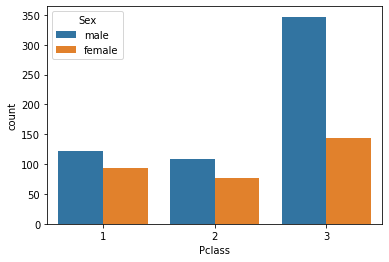

In [0]:
print('Распределение пассажиров по классам')
ax = sns.countplot(x="Pclass", hue="Sex", data=df)

In [0]:
print('Больше всего на Титанике было {}, а именно {} человек'.format(df.Sex.describe(). top, df.Sex.describe().freq))
df_sex = df.groupby('Sex')[['Survived']].mean()
print('Доля выживших женщин и мужчин составили:', np.round(df_sex.Survived.values,2))
df_class = df.groupby('Pclass')[['Survived']].mean()
print('Доля выживших пассажиров 1, 2 и 3 классов составили:', np.round(df_class.Survived.values,2))

Больше всего на Титанике было male, а именно 577 человек
Доля выживших женщин и мужчин составили: [0.74 0.19]
Доля выживших пассажиров 1, 2 и 3 классов составили: [0.63 0.47 0.24]


Распределение выживших в зависимости от класса и пола


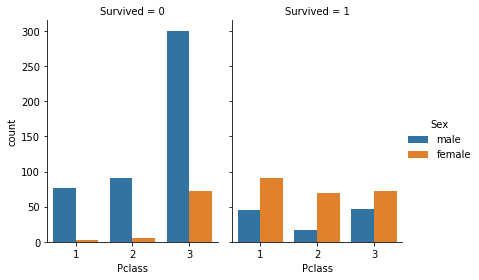

In [0]:
>>> print('Распределение выживших в зависимости от класса и пола')
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
...                 data=df, kind="count",
...                 height=4, aspect=.7);

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


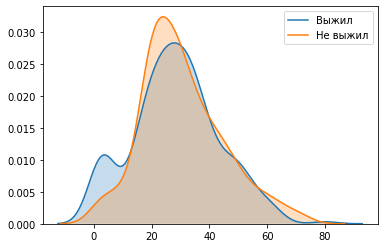

In [0]:
sns.kdeplot(df[df.Survived==1].Age, shade=True, label='Выжил')
sns.kdeplot(df[df.Survived==0].Age, shade=True, label='Не выжил')

Доля выживших пассажиров для младших возрастов выше (синий график лежит выше желтого)



### Задача 8 (1 балл)
Сгруппируйте данные по классам пассажиров, в каждом посчитав средний возраст. Используйте функцию pd.groupby().

Сделайте выводы. 

In [0]:
for i, group in df.groupby('Pclass'):
  print("Средний возраст пассажира в {} классе равен {}".format(i, round(group.Age.mean(),1)))

Средний возраст пассажира в 1 классе равен 38.2
Средний возраст пассажира в 2 классе равен 29.9
Средний возраст пассажира в 3 классе равен 25.1


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

### Задача 9 (1 балл)
Постройте гистограмму распределения стоимости билета (Fare) по всем пассажирам. Воспользуйтесь функцией plt.hist(). 

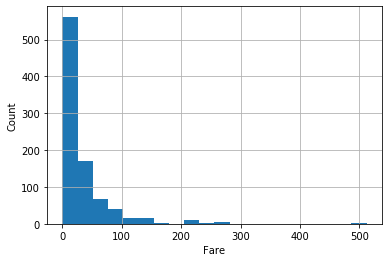

In [0]:
df.Fare.hist(bins=20);
plt.xlabel('Fare');
plt.ylabel('Count');

### Задача 10 (3 балла)

Найдите все признаки, для которых есть пропуски в данных. Обычно алгоритмы по умолчанию не умеют обрабатывать такие данные. Предложите способы обработки данных с пропусками (не менее двух) и укажите достоинства/недостаки каждого. Проиллюстрируйте работу хотя бы одного из них на примере данного датасета.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
df.isnull().describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,891,891,891,891,891,891,891
unique,1,1,1,1,1,2,1,1,1,1,2,2
top,False,False,False,False,False,False,False,False,False,False,True,False
freq,891,891,891,891,891,714,891,891,891,891,687,889


Видно, что пропуски имеют колонки "Age", "Cabin", "Embarked"

Строки с пропусками можно удалять

In [0]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Или, например удалить столбцы, где много пропусков

In [0]:
df.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


Пропуски для количественных признаков можно заполнять 1) средним значением (медианой) или даже модой 2) большим числом (для "деревянных алгоритмов")

In [0]:
df.fillna(df.mean(axis=0))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,891,891,891,891,891,891,891
unique,1,1,1,1,1,1,1,1,1,1,2,2
top,False,False,False,False,False,False,False,False,False,False,True,False
freq,891,891,891,891,891,891,891,891,891,891,687,889


In [0]:
df.fillna(999)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,999,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,999,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,999,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,999,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,999.0,1,2,W./C. 6607,23.4500,999,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Для категориальных признаков 1) можно заполнять наиболее часто встречающимся значением 2) можно создать отдельную категорию (если пропуски неслучайны) 3) в данном случае эти столбцы скорее всего можно просто удалить


In [0]:
col = df.columns[df.dtypes=='object']
dct = {'Cabin' : 'AA', 
       'Embarked' : 'AAA'}
df[col].fillna(dct)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,AA,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,AA,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,AA,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,AA,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,AA,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C
